# Get the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

from pandas.plotting import scatter_matrix
import math

In [2]:
import tensorflow as tf
#from tensorflow import keras
import keras
print(tf.__version__)
print(keras.__version__)

2025-02-06 09:42:12.551578: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-06 09:42:12.552098: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-06 09:42:12.554702: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-06 09:42:12.589737: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-06 09:42:13.320190: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

2.16.1
3.0.5


## Define global constants

In [3]:
#MY_OPTIMIZER = "SGD"
# MY_EPOCHS = 1000
# MY_LEARNING_RATE = 0.000001
# MY_BATCH_SIZE = 2048
MY_EPOCHS = 1000
MY_LEARNING_RATE = 0.000001
MY_BATCH_SIZE = 128

# Get the Data

In [4]:
maneuvers = pd.read_csv("maneuvers2.csv")
#maneuvers.head()
maneuvers.shape

(2051, 8)

In [5]:
maneuvers.describe()

,t,x,y,z,dx,dy,dz,dv_st
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2.051000e+03
mean,3144.884951,-0.990325,0.004411,-0.000403,0.003202,-0.001907,-0.002009,1.274357e-11
std,1811.726067,0.000159,0.000097,0.000101,0.000057,0.000876,0.000105,2.459842e-12
min,9.177680,-0.990616,0.004185,-0.000603,0.003047,-0.003457,-0.002229,-6.558979e-12
25%,1577.031315,-0.990462,0.004335,-0.000488,0.003162,-0.002667,-0.002087,1.073163e-11
50%,3144.884951,-0.990326,0.004432,-0.000404,0.003223,-0.001919,-0.002004,1.152931e-11
75%,4712.738586,-0.990188,0.004497,-0.000317,0.003246,-0.001152,-0.001936,1.511993e-11
max,6280.592222,-0.990036,0.004545,-0.000217,0.003271,-0.000256,-0.001775,1.840042e-11


## Add/Drop Features

Try adding new attribute "angle" = angle in the periodic orbit, which is essentially time/period.

In [6]:
# Drop dx and dz features, since they are almost proportional to y
#maneuvers = maneuvers.drop(["dx", "dz"], axis=1)

#maneuvers["angle"]=maneuvers["t"].apply(lambda x: math.fmod(x, 0.3059226605957322E+01))
maneuvers = maneuvers.drop(["t"], axis=1)


# Prepare the Data for Machine Learning Algorithms

In [7]:
# Let's separate the predictors and the labels
maneuvers_predictors = maneuvers.drop("dv_st", axis=1)
maneuvers_labels = maneuvers[["dv_st"]].copy()

# Convert dataframe to a numpy array before training, to avoid issues with dataframe headers.
maneuvers_predictors = maneuvers_predictors.to_numpy()
maneuvers_labels = maneuvers_labels.to_numpy()

#maneuvers_predictors.head()
#maneuvers_labels.head()

## Create a Train/Test/Validation Set

In [8]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
maneuvers_predictors, maneuvers_labels, test_size=0.2, random_state=1)
X_train, X_valid, y_train, y_valid = train_test_split(
X_train_full, y_train_full)
print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)
print(X_train[:4])

(1230, 6)
(411, 6)
(410, 6)
[[-9.90220123e-01  4.37218761e-03 -4.32637485e-04  3.26215430e-03
  -2.49896072e-03 -1.90249162e-03]
 [-9.90564062e-01  4.52020401e-03 -2.25194394e-04  3.09115154e-03
  -5.55989424e-04 -2.15508687e-03]
 [-9.90131751e-01  4.27619614e-03 -5.61435326e-04  3.24305502e-03
  -2.95924149e-03 -1.96049773e-03]
 [-9.90551580e-01  4.53736417e-03 -2.61390659e-04  3.11495706e-03
  -6.46462482e-04 -1.99905796e-03]]


In [9]:
# Scale all the features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5]

array([[0.68267739, 0.51939876, 0.44049291, 0.96213188, 0.29933774,
        0.72039977],
       [0.08899628, 0.92985744, 0.97884723, 0.19723764, 0.90642218,
        0.16289893],
       [0.83521832, 0.25320846, 0.106238  , 0.8767009 , 0.15552228,
        0.59237499],
       [0.11054275, 0.97744365, 0.88491103, 0.30371957, 0.87815373,
        0.50726902],
       [0.57486561, 0.59407082, 0.35355164, 0.81791819, 0.40674793,
        0.4672481 ]])

In [10]:
# Scale target variable dv_st as well.
# Rationale: dv_st takes very small values (10^{-8}), 
# so MSE may be tiny and not computed properly. Also, NN may converge faster?

scaler_target = MinMaxScaler()
y_train_scaled = scaler_target.fit_transform(y_train)
y_valid_scaled = scaler_target.transform(y_valid)
y_test_scaled = scaler_target.transform(y_test)
y_train_scaled[:5]

array([[0.8842162 ],
       [0.70430542],
       [0.86210422],
       [0.66160385],
       [0.70288004]])

In [11]:
# Try adding degree 2 polynomial features. This worked well for polynomial regression 
# (see supervised.py).
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_scaled = poly_features.fit_transform(X_train_scaled)
X_valid_scaled = poly_features.transform(X_valid_scaled)
X_test_scaled = poly_features.transform(X_test_scaled)

X_train_scaled[:5]

array([[0.68267739, 0.51939876, 0.44049291, 0.96213188, 0.29933774,
        0.72039977, 0.46604841, 0.35458179, 0.30071455, 0.65682568,
        0.2043511 , 0.49180063, 0.26977507, 0.22879147, 0.49973011,
        0.15547565, 0.37417475, 0.19403401, 0.42381228, 0.13185615,
        0.31733099, 0.92569776, 0.28800238, 0.69311959, 0.08960308,
        0.21564284, 0.51897583],
       [0.08899628, 0.92985744, 0.97884723, 0.19723764, 0.90642218,
        0.16289893, 0.00792034, 0.08275385, 0.08711376, 0.01755342,
        0.0806682 , 0.0144974 , 0.86463486, 0.91018838, 0.18340289,
        0.84284341, 0.15147278, 0.9581419 , 0.19306552, 0.88724884,
        0.15945316, 0.03890269, 0.17878057, 0.0321298 , 0.82160117,
        0.1476552 , 0.02653606],
       [0.83521832, 0.25320846, 0.106238  , 0.8767009 , 0.15552228,
        0.59237499, 0.69758965, 0.21148434, 0.08873192, 0.73223666,
        0.12989506, 0.49476244, 0.06411452, 0.02690036, 0.22198808,
        0.03937956, 0.14999436, 0.01128651, 0.0931

In [12]:
import joblib
joblib.dump(scaler, 'scaler.gz')
joblib.dump(scaler_target, 'scaler_target.gz')

['scaler_target.gz']

In [13]:
cov=np.cov(X_train_scaled, rowvar=False)
cond = np.linalg.cond(cov)
max_eig = np.linalg.eigvals(cov).max()
print(f"condition number is {cond}, max eigenvalue {max_eig:.2f}")

condition number is 3.635254919730807e+16, max eigenvalue 1.20


# Building, Training, and Evaluating the Model

The output layer has a single neuron (since we only want to
predict a single value) and uses no activation function, and the loss function is the mean squared error. 

Since the dataset is quite noisy, we just use a single hidden layer with fewer neurons than before, to avoid overfitting.

In [14]:
model = keras.models.Sequential([
keras.layers.Dense(300, activation="relu", input_shape=X_train_scaled.shape[1:]),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(1)
])
model.summary()

/home/pablo/anaconda3/envs/halo/lib/python3.12/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 300)            │         8,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,601 (150.79 KB)

 Trainable params: 38,601 (150.79 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
#opt = keras.optimizers.SGD(learning_rate=MY_LEARNING_RATE)
opt = keras.optimizers.Adam(learning_rate=MY_LEARNING_RATE)
model.compile(loss="mean_squared_error", optimizer=opt)
history = model.fit(X_train_scaled, y_train_scaled, epochs=MY_EPOCHS, batch_size=MY_BATCH_SIZE,
                    validation_data=(X_valid_scaled, y_valid_scaled))

Epoch 1/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.5558 - val_loss: 0.5571
Epoch 2/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5579 - val_loss: 0.5533
Epoch 3/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5560 - val_loss: 0.5496
Epoch 4/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5450 - val_loss: 0.5458
Epoch 5/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5408 - val_loss: 0.5421
Epoch 6/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5424 - val_loss: 0.5384
Epoch 7/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5389 - val_loss: 0.5347
Epoch 8/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5357 - val_loss: 0.5310
Epoch 9/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5329 - val_loss: 0.5274
Epoch 10/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5304 - val_loss: 0.5238
Epoch 11/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5229 - val_loss: 0.5202
Epoch 12/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/ste

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3492 - val_loss: 0.3448
Epoch 69/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3433 - val_loss: 0.3422
Epoch 70/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3424 - val_loss: 0.3396
Epoch 71/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3382 - val_loss: 0.3370
Epoch 72/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3339 - val_loss: 0.3344
Epoch 73/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3334 - val_loss: 0.3319
Epoch 74/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3272 - val_loss: 0.3294
Epoch 75/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3344 - val_loss: 0.3268
Epoch 76/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3273 - val_loss: 0.3243
Epoch 77/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3280 - val_loss: 0.3218
Epoch 78/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3173 - val_loss: 0.3194
Epoch 79/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - lo

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1993 - val_loss: 0.1994
Epoch 136/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1988 - val_loss: 0.1977
Epoch 137/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1971 - val_loss: 0.1959
Epoch 138/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1955 - val_loss: 0.1942
Epoch 139/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1937 - val_loss: 0.1925
Epoch 140/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1895 - val_loss: 0.1908
Epoch 141/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1911 - val_loss: 0.1891
Epoch 142/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1897 - val_loss: 0.1874
Epoch 143/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1852 - val_loss: 0.1858
Epoch 144/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1897 - val_loss: 0.1841
Epoch 145/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1842 - val_loss: 0.1824
Epoch 146/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4m

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1076 - val_loss: 0.1062
Epoch 203/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1077 - val_loss: 0.1051
Epoch 204/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1041 - val_loss: 0.1041
Epoch 205/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1024 - val_loss: 0.1030
Epoch 206/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1030 - val_loss: 0.1020
Epoch 207/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0965 - val_loss: 0.1010
Epoch 208/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1008 - val_loss: 0.1000
Epoch 209/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1035 - val_loss: 0.0990
Epoch 210/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0968 - val_loss: 0.0980
Epoch 211/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0958 - val_loss: 0.0970
Epoch 212/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0954 - val_loss: 0.0960
Epoch 213/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4m

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0554 - val_loss: 0.0535
Epoch 270/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0522 - val_loss: 0.0530
Epoch 271/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0528 - val_loss: 0.0525
Epoch 272/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0512 - val_loss: 0.0519
Epoch 273/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0512 - val_loss: 0.0514
Epoch 274/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0510 - val_loss: 0.0509
Epoch 275/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0505 - val_loss: 0.0504
Epoch 276/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0506 - val_loss: 0.0499
Epoch 277/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0488 - val_loss: 0.0494
Epoch 278/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0491 - val_loss: 0.0489
Epoch 279/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0471 - val_loss: 0.0484
Epoch 280/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4m

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0280 - val_loss: 0.0285
Epoch 337/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0280 - val_loss: 0.0282
Epoch 338/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0263 - val_loss: 0.0280
Epoch 339/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0283 - val_loss: 0.0278
Epoch 340/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0276 - val_loss: 0.0275
Epoch 341/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0270 - val_loss: 0.0273
Epoch 342/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0265 - val_loss: 0.0271
Epoch 343/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0273 - val_loss: 0.0269
Epoch 344/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0256 - val_loss: 0.0267
Epoch 345/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0269 - val_loss: 0.0264
Epoch 346/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0265 - val_loss: 0.0262
Epoch 347/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4m

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0173 - val_loss: 0.0178
Epoch 404/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0186 - val_loss: 0.0177
Epoch 405/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0185 - val_loss: 0.0176
Epoch 406/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0175 - val_loss: 0.0175
Epoch 407/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0164 - val_loss: 0.0174
Epoch 408/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0166 - val_loss: 0.0173
Epoch 409/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0163 - val_loss: 0.0172
Epoch 410/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0173 - val_loss: 0.0171
Epoch 411/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0165 - val_loss: 0.0170
Epoch 412/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0164 - val_loss: 0.0169
Epoch 413/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0158 - val_loss: 0.0169
Epoch 414/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4m

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0123 - val_loss: 0.0128
Epoch 471/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0127 - val_loss: 0.0127
Epoch 472/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0135 - val_loss: 0.0127
Epoch 473/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0122 - val_loss: 0.0126
Epoch 474/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0122 - val_loss: 0.0126
Epoch 475/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0121 - val_loss: 0.0125
Epoch 476/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0123 - val_loss: 0.0124
Epoch 477/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0128 - val_loss: 0.0124
Epoch 478/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0121 - val_loss: 0.0123
Epoch 479/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0122 - val_loss: 0.0123
Epoch 480/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0123 - val_loss: 0.0122
Epoch 481/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4m

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0109 - val_loss: 0.0098
Epoch 538/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 - val_loss: 0.0098
Epoch 539/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 - val_loss: 0.0097
Epoch 540/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0099 - val_loss: 0.0097
Epoch 541/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0107 - val_loss: 0.0097
Epoch 542/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0099 - val_loss: 0.0096
Epoch 543/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0094 - val_loss: 0.0096
Epoch 544/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0100 - val_loss: 0.0096
Epoch 545/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0093 - val_loss: 0.0095
Epoch 546/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0102 - val_loss: 0.0095
Epoch 547/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088 - val_loss: 0.0095
Epoch 548/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4m

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0076 - val_loss: 0.0078
Epoch 605/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0078 - val_loss: 0.0078
Epoch 606/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0089 - val_loss: 0.0078
Epoch 607/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0079 - val_loss: 0.0078
Epoch 608/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0075 - val_loss: 0.0077
Epoch 609/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0079 - val_loss: 0.0077
Epoch 610/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0089 - val_loss: 0.0077
Epoch 611/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0077 - val_loss: 0.0077
Epoch 612/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0079 - val_loss: 0.0076
Epoch 613/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0081 - val_loss: 0.0076
Epoch 614/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0073 - val_loss: 0.0076
Epoch 615/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4m

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - val_loss: 0.0064
Epoch 672/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0066 - val_loss: 0.0064
Epoch 673/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0064 - val_loss: 0.0063
Epoch 674/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0065 - val_loss: 0.0063
Epoch 675/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0064 - val_loss: 0.0063
Epoch 676/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0068 - val_loss: 0.0063
Epoch 677/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0066 - val_loss: 0.0063
Epoch 678/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0064 - val_loss: 0.0062
Epoch 679/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0066 - val_loss: 0.0062
Epoch 680/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0069 - val_loss: 0.0062
Epoch 681/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0069 - val_loss: 0.0062
Epoch 682/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4m

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0051 - val_loss: 0.0053
Epoch 739/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0054 - val_loss: 0.0052
Epoch 740/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0053 - val_loss: 0.0052
Epoch 741/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0059 - val_loss: 0.0052
Epoch 742/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0064 - val_loss: 0.0052
Epoch 743/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0053 - val_loss: 0.0052
Epoch 744/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0058 - val_loss: 0.0052
Epoch 745/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0065 - val_loss: 0.0051
Epoch 746/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0055 - val_loss: 0.0051
Epoch 747/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0053 - val_loss: 0.0051
Epoch 748/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0057 - val_loss: 0.0051
Epoch 749/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4m

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0046 - val_loss: 0.0043
Epoch 806/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0055 - val_loss: 0.0043
Epoch 807/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052 - val_loss: 0.0043
Epoch 808/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0046 - val_loss: 0.0043
Epoch 809/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0045 - val_loss: 0.0043
Epoch 810/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0045 - val_loss: 0.0043
Epoch 811/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0046 - val_loss: 0.0043
Epoch 812/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 - val_loss: 0.0043
Epoch 813/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 814/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 - val_loss: 0.0042
Epoch 815/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0056 - val_loss: 0.0042
Epoch 816/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4m

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0045 - val_loss: 0.0036
Epoch 873/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 - val_loss: 0.0036
Epoch 874/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0041 - val_loss: 0.0036
Epoch 875/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 - val_loss: 0.0036
Epoch 876/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0038 - val_loss: 0.0036
Epoch 877/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0042 - val_loss: 0.0035
Epoch 878/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 879/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 880/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 - val_loss: 0.0035
Epoch 881/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 882/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0043 - val_loss: 0.0035
Epoch 883/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4m

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0033 - val_loss: 0.0030
Epoch 940/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0041 - val_loss: 0.0030
Epoch 941/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0034 - val_loss: 0.0030
Epoch 942/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0035 - val_loss: 0.0030
Epoch 943/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0035 - val_loss: 0.0030
Epoch 944/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0042 - val_loss: 0.0030
Epoch 945/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 946/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0041 - val_loss: 0.0030
Epoch 947/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0033 - val_loss: 0.0030
Epoch 948/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 949/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0035 - val_loss: 0.0030
Epoch 950/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4m

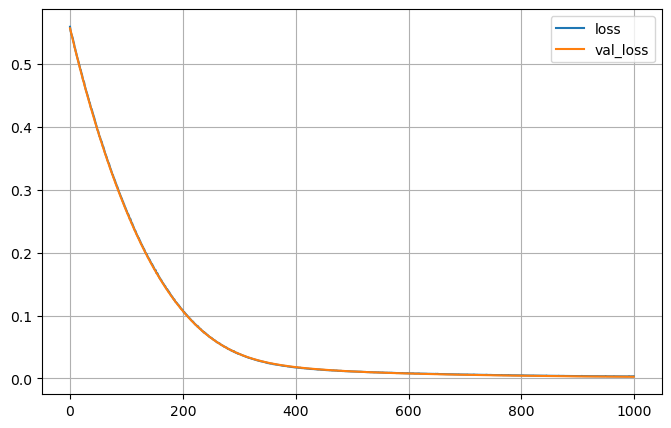

In [16]:
# Plot learning curves
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 5e-4) # set the vertical range to [0-1]
plt.show()

In [17]:
mse_test = model.evaluate(X_test_scaled, y_test_scaled)
np.sqrt(mse_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0031 


0.05445898370681575

In [18]:
X_new = X_test_scaled[:3] # pretend these are new instances
y_pred = model.predict(X_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [19]:
y_test_scaled[:3]

array([[0.66444714],
       [0.9096864 ],
       [0.6990666 ]])

In [20]:
y_pred[:3]

array([[0.6737348 ],
       [0.82048875],
       [0.6855803 ]], dtype=float32)

# Fine-Tuning Neural Network Hyperparameters

Wrap our Keras models in objects that mimic regular Scikit-Learn regressors.

def build_model(n_hidden, n_neurons, learning_rate, 
                input_shape):
    model = keras.models.Sequential()
    options = {"input_shape": input_shape}
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu", 
                                     **options))
        options = {}
    model.add(keras.layers.Dense(1, **options))
    optimizer = keras.optimizers.SGD(learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

from scikeras.wrappers import KerasRegressor

keras_reg = KerasRegressor(build_model, n_hidden=1, n_neurons=30, learning_rate=3e-3, 
                input_shape=[8])

In [21]:
import keras
from keras import layers


def build_model(hp):
    model = keras.Sequential()
    #model.add(layers.Flatten())
    # Tune the number of layers.
    for i in range(hp.Int("num_layers", 1, 5)):
        model.add(
            layers.Dense(
               # Tune number of units separately for each layer.
                units=hp.Int(f"units_{i}", min_value=32, max_value=512, step=32),
                activation="relu",
            )
        )
    model.add(layers.Dense(1))
    #learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(
        #optimizer=keras.optimizers.SGD(learning_rate=MY_LEARNING_RATE),
        optimizer=keras.optimizers.Adam(learning_rate=MY_LEARNING_RATE),
        #optimizer=MY_OPTIMIZER,
        loss="mean_squared_error",
    )
    return model

In [22]:
# Quickly test if model builds successfuly
import keras_tuner

build_model(keras_tuner.HyperParameters())

<Sequential name=sequential_1, built=False>

Use a randomized search to train hundreds of hyperparameter combinations  and see which one performs best on the validation set.

Note that RandomizedSearchCV uses K-fold cross-validation, so it
does not use X_valid and y_valid_scaled . These are just used for early stopping.

from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, 
                                   n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train_scaled, epochs=100,
                  validation_data=(X_valid, y_valid_scaled),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

In [23]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_loss",
    max_trials=20,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)

In [24]:
# print a summary of the search space
tuner.search_space_summary()

Search space summary
Default search space size: 2
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 5, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}


Then, start the search for the best hyperparameter configuration. All the arguments passed to search is passed to model.fit() in each execution. Remember to pass validation_data to evaluate the model.

In [25]:
tuner.search(X_train_scaled, y_train_scaled, epochs=MY_EPOCHS, batch_size=MY_BATCH_SIZE, validation_data=(X_valid_scaled, y_valid_scaled))

Trial 1 Complete [00h 01m 54s]
val_loss: 0.01162740308791399

Best val_loss So Far: 0.01162740308791399
Total elapsed time: 00h 01m 54s

Search: Running Trial #2

Value             |Best Value So Far |Hyperparameter
2                 |2                 |num_layers
32                |192               |units_0
128               |32                |units_1

Epoch 1/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.3952 - val_loss: 0.4019
Epoch 2/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4011 - val_loss: 0.4008
Epoch 3/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3983 - val_loss: 0.3996
Epoch 4/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3911 - val_loss: 0.3985
Epoch 5/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4003 - val_loss: 0.3974
Epoch 6/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3966 - val_loss: 0.3962
Epoch 7/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3989 - val_loss: 0.3951
Epoch 8/1000
10/10 ━━━━━━━━━━━━━━━━━━━━

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3325 - val_loss: 0.3339
Epoch 66/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3298 - val_loss: 0.3329
Epoch 67/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3304 - val_loss: 0.3319
Epoch 68/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3272 - val_loss: 0.3309
Epoch 69/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3324 - val_loss: 0.3300
Epoch 70/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3331 - val_loss: 0.3290
Epoch 71/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3266 - val_loss: 0.3280
Epoch 72/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3303 - val_loss: 0.3270
Epoch 73/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3235 - val_loss: 0.3260
Epoch 74/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3233 - val_loss: 0.3251
Epoch 75/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3215 - val_loss: 0.3241
Epoch 76/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - lo

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2723 - val_loss: 0.2720
Epoch 133/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2706 - val_loss: 0.2712
Epoch 134/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2663 - val_loss: 0.2703
Epoch 135/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2703 - val_loss: 0.2695
Epoch 136/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2648 - val_loss: 0.2686
Epoch 137/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2674 - val_loss: 0.2678
Epoch 138/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2678 - val_loss: 0.2669
Epoch 139/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2614 - val_loss: 0.2661
Epoch 140/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2635 - val_loss: 0.2652
Epoch 141/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2590 - val_loss: 0.2644
Epoch 142/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2609 - val_loss: 0.2635
Epoch 143/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5m

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2191 - val_loss: 0.2185
Epoch 200/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2170 - val_loss: 0.2178
Epoch 201/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2185 - val_loss: 0.2171
Epoch 202/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2140 - val_loss: 0.2163
Epoch 203/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2093 - val_loss: 0.2156
Epoch 204/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2156 - val_loss: 0.2149
Epoch 205/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2166 - val_loss: 0.2141
Epoch 206/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2125 - val_loss: 0.2134
Epoch 207/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2112 - val_loss: 0.2127
Epoch 208/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2100 - val_loss: 0.2119
Epoch 209/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2114 - val_loss: 0.2112
Epoch 210/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4m

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1695 - val_loss: 0.1725
Epoch 267/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1679 - val_loss: 0.1719
Epoch 268/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1710 - val_loss: 0.1713
Epoch 269/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1689 - val_loss: 0.1706
Epoch 270/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1667 - val_loss: 0.1700
Epoch 271/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1709 - val_loss: 0.1694
Epoch 272/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1661 - val_loss: 0.1688
Epoch 273/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1716 - val_loss: 0.1681
Epoch 274/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1668 - val_loss: 0.1675
Epoch 275/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1664 - val_loss: 0.1669
Epoch 276/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1669 - val_loss: 0.1663
Epoch 277/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4m

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1340 - val_loss: 0.1334
Epoch 334/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1305 - val_loss: 0.1329
Epoch 335/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1323 - val_loss: 0.1323
Epoch 336/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1308 - val_loss: 0.1318
Epoch 337/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1294 - val_loss: 0.1313
Epoch 338/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1318 - val_loss: 0.1308
Epoch 339/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1307 - val_loss: 0.1302
Epoch 340/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1301 - val_loss: 0.1297
Epoch 341/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1295 - val_loss: 0.1292
Epoch 342/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1293 - val_loss: 0.1287
Epoch 343/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1298 - val_loss: 0.1281
Epoch 344/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4m

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1025 - val_loss: 0.1008
Epoch 401/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0963 - val_loss: 0.1004
Epoch 402/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0978 - val_loss: 0.0999
Epoch 403/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1007 - val_loss: 0.0995
Epoch 404/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1014 - val_loss: 0.0991
Epoch 405/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0998 - val_loss: 0.0986
Epoch 406/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0971 - val_loss: 0.0982
Epoch 407/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0979 - val_loss: 0.0978
Epoch 408/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0971 - val_loss: 0.0974
Epoch 409/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0937 - val_loss: 0.0969
Epoch 410/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0987 - val_loss: 0.0965
Epoch 411/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4m

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0743 - val_loss: 0.0744
Epoch 468/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0723 - val_loss: 0.0741
Epoch 469/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0753 - val_loss: 0.0737
Epoch 470/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0726 - val_loss: 0.0734
Epoch 471/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0723 - val_loss: 0.0730
Epoch 472/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0731 - val_loss: 0.0727
Epoch 473/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0721 - val_loss: 0.0724
Epoch 474/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0723 - val_loss: 0.0720
Epoch 475/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0693 - val_loss: 0.0717
Epoch 476/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0693 - val_loss: 0.0713
Epoch 477/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0715 - val_loss: 0.0710
Epoch 478/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5m

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0530 - val_loss: 0.0538
Epoch 535/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0522 - val_loss: 0.0536
Epoch 536/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0535 - val_loss: 0.0533
Epoch 537/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0531 - val_loss: 0.0530
Epoch 538/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0501 - val_loss: 0.0528
Epoch 539/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0545 - val_loss: 0.0525
Epoch 540/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0524 - val_loss: 0.0522
Epoch 541/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0522 - val_loss: 0.0520
Epoch 542/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0507 - val_loss: 0.0517
Epoch 543/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0499 - val_loss: 0.0515
Epoch 544/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0490 - val_loss: 0.0512
Epoch 545/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4m

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0375 - val_loss: 0.0385
Epoch 602/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0363 - val_loss: 0.0383
Epoch 603/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0373 - val_loss: 0.0381
Epoch 604/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0391 - val_loss: 0.0379
Epoch 605/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0367 - val_loss: 0.0377
Epoch 606/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0370 - val_loss: 0.0375
Epoch 607/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0375 - val_loss: 0.0373
Epoch 608/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0354 - val_loss: 0.0372
Epoch 609/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0361 - val_loss: 0.0370
Epoch 610/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0362 - val_loss: 0.0368
Epoch 611/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0380 - val_loss: 0.0366
Epoch 612/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4m

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0279 - val_loss: 0.0278
Epoch 669/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0282 - val_loss: 0.0277
Epoch 670/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0273 - val_loss: 0.0275
Epoch 671/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0273 - val_loss: 0.0274
Epoch 672/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0286 - val_loss: 0.0273
Epoch 673/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0272 - val_loss: 0.0272
Epoch 674/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0252 - val_loss: 0.0270
Epoch 675/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0255 - val_loss: 0.0269
Epoch 676/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0275 - val_loss: 0.0268
Epoch 677/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0263 - val_loss: 0.0267
Epoch 678/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0269 - val_loss: 0.0265
Epoch 679/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4m

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0233 - val_loss: 0.0208
Epoch 736/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0214 - val_loss: 0.0208
Epoch 737/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0215 - val_loss: 0.0207
Epoch 738/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0205 - val_loss: 0.0206
Epoch 739/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0210 - val_loss: 0.0205
Epoch 740/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0198 - val_loss: 0.0204
Epoch 741/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0195 - val_loss: 0.0204
Epoch 742/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0190 - val_loss: 0.0203
Epoch 743/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0205 - val_loss: 0.0202
Epoch 744/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0201 - val_loss: 0.0201
Epoch 745/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0203 - val_loss: 0.0201
Epoch 746/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4m

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0158 - val_loss: 0.0165
Epoch 803/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0166 - val_loss: 0.0164
Epoch 804/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0160 - val_loss: 0.0164
Epoch 805/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0158 - val_loss: 0.0163
Epoch 806/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0159 - val_loss: 0.0162
Epoch 807/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0165 - val_loss: 0.0162
Epoch 808/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0162 - val_loss: 0.0161
Epoch 809/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0162 - val_loss: 0.0161
Epoch 810/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0172 - val_loss: 0.0160
Epoch 811/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0156 - val_loss: 0.0160
Epoch 812/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0169 - val_loss: 0.0159
Epoch 813/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4m

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0133 - val_loss: 0.0136
Epoch 870/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0141 - val_loss: 0.0135
Epoch 871/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0148 - val_loss: 0.0135
Epoch 872/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0143 - val_loss: 0.0135
Epoch 873/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0136 - val_loss: 0.0134
Epoch 874/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0145 - val_loss: 0.0134
Epoch 875/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0134 - val_loss: 0.0134
Epoch 876/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0132 - val_loss: 0.0133
Epoch 877/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0129 - val_loss: 0.0133
Epoch 878/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0141 - val_loss: 0.0133
Epoch 879/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0135 - val_loss: 0.0132
Epoch 880/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5m

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0119 - val_loss: 0.0116
Epoch 937/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0120 - val_loss: 0.0116
Epoch 938/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0121 - val_loss: 0.0115
Epoch 939/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0111 - val_loss: 0.0115
Epoch 940/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0116 - val_loss: 0.0115
Epoch 941/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0122 - val_loss: 0.0115
Epoch 942/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0122 - val_loss: 0.0114
Epoch 943/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0116 - val_loss: 0.0114
Epoch 944/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0114 - val_loss: 0.0114
Epoch 945/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0120 - val_loss: 0.0114
Epoch 946/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0112 - val_loss: 0.0114
Epoch 947/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4m

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4527 - val_loss: 0.4564
Epoch 4/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4497 - val_loss: 0.4555
Epoch 5/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4516 - val_loss: 0.4546
Epoch 6/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4485 - val_loss: 0.4536
Epoch 7/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4506 - val_loss: 0.4527
Epoch 8/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4498 - val_loss: 0.4518
Epoch 9/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4459 - val_loss: 0.4508
Epoch 10/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4474 - val_loss: 0.4499
Epoch 11/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4464 - val_loss: 0.4490
Epoch 12/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4448 - val_loss: 0.4481
Epoch 13/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4430 - val_loss: 0.4472
Epoch 14/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.

Epoch 71/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3892 - val_loss: 0.3958
Epoch 72/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3899 - val_loss: 0.3949
Epoch 73/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3943 - val_loss: 0.3941
Epoch 74/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3872 - val_loss: 0.3932
Epoch 75/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3927 - val_loss: 0.3924
Epoch 76/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3885 - val_loss: 0.3915
Epoch 77/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3864 - val_loss: 0.3907
Epoch 78/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3856 - val_loss: 0.3898
Epoch 79/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3832 - val_loss: 0.3890
Epoch 80/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3852 - val_loss: 0.3881
Epoch 81/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3860 - val_loss: 0.3873
Epoch 82/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3398 - val_loss: 0.3412
Epoch 139/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3353 - val_loss: 0.3404
Epoch 140/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3361 - val_loss: 0.3396
Epoch 141/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3318 - val_loss: 0.3389
Epoch 142/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3333 - val_loss: 0.3381
Epoch 143/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3339 - val_loss: 0.3373
Epoch 144/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3358 - val_loss: 0.3365
Epoch 145/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3341 - val_loss: 0.3358
Epoch 146/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3323 - val_loss: 0.3350
Epoch 147/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3299 - val_loss: 0.3342
Epoch 148/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3277 - val_loss: 0.3335
Epoch 149/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3m

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2886 - val_loss: 0.2915
Epoch 206/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2875 - val_loss: 0.2908
Epoch 207/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2863 - val_loss: 0.2901
Epoch 208/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2852 - val_loss: 0.2894
Epoch 209/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2891 - val_loss: 0.2887
Epoch 210/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2839 - val_loss: 0.2880
Epoch 211/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2813 - val_loss: 0.2873
Epoch 212/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2856 - val_loss: 0.2866
Epoch 213/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2785 - val_loss: 0.2859
Epoch 214/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2818 - val_loss: 0.2852
Epoch 215/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2813 - val_loss: 0.2845
Epoch 216/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3m

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2455 - val_loss: 0.2463
Epoch 273/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2442 - val_loss: 0.2456
Epoch 274/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2423 - val_loss: 0.2450
Epoch 275/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2426 - val_loss: 0.2443
Epoch 276/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2411 - val_loss: 0.2437
Epoch 277/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2466 - val_loss: 0.2431
Epoch 278/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2417 - val_loss: 0.2424
Epoch 279/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2438 - val_loss: 0.2418
Epoch 280/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2404 - val_loss: 0.2411
Epoch 281/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2343 - val_loss: 0.2405
Epoch 282/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2368 - val_loss: 0.2399
Epoch 283/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3m

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2028 - val_loss: 0.2054
Epoch 340/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2061 - val_loss: 0.2048
Epoch 341/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2000 - val_loss: 0.2042
Epoch 342/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2031 - val_loss: 0.2037
Epoch 343/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1991 - val_loss: 0.2031
Epoch 344/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2002 - val_loss: 0.2025
Epoch 345/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2004 - val_loss: 0.2019
Epoch 346/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2021 - val_loss: 0.2014
Epoch 347/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2002 - val_loss: 0.2008
Epoch 348/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1975 - val_loss: 0.2002
Epoch 349/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1991 - val_loss: 0.1997
Epoch 350/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4m

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1665 - val_loss: 0.1688
Epoch 407/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1659 - val_loss: 0.1682
Epoch 408/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1667 - val_loss: 0.1677
Epoch 409/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1655 - val_loss: 0.1672
Epoch 410/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1627 - val_loss: 0.1667
Epoch 411/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1673 - val_loss: 0.1662
Epoch 412/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1663 - val_loss: 0.1657
Epoch 413/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1613 - val_loss: 0.1652
Epoch 414/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1608 - val_loss: 0.1647
Epoch 415/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1614 - val_loss: 0.1641
Epoch 416/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1614 - val_loss: 0.1636
Epoch 417/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3m

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1336 - val_loss: 0.1362
Epoch 474/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1368 - val_loss: 0.1357
Epoch 475/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1344 - val_loss: 0.1353
Epoch 476/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1332 - val_loss: 0.1348
Epoch 477/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1328 - val_loss: 0.1344
Epoch 478/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1330 - val_loss: 0.1339
Epoch 479/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1359 - val_loss: 0.1335
Epoch 480/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1306 - val_loss: 0.1330
Epoch 481/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1310 - val_loss: 0.1326
Epoch 482/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1302 - val_loss: 0.1321
Epoch 483/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1295 - val_loss: 0.1317
Epoch 484/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3m

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1066 - val_loss: 0.1079
Epoch 541/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1051 - val_loss: 0.1075
Epoch 542/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1046 - val_loss: 0.1071
Epoch 543/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1085 - val_loss: 0.1067
Epoch 544/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1060 - val_loss: 0.1063
Epoch 545/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1065 - val_loss: 0.1059
Epoch 546/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1047 - val_loss: 0.1055
Epoch 547/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1028 - val_loss: 0.1051
Epoch 548/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1027 - val_loss: 0.1048
Epoch 549/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1022 - val_loss: 0.1044
Epoch 550/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1020 - val_loss: 0.1040
Epoch 551/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4m

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0832 - val_loss: 0.0838
Epoch 608/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0818 - val_loss: 0.0835
Epoch 609/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0814 - val_loss: 0.0831
Epoch 610/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0868 - val_loss: 0.0828
Epoch 611/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0827 - val_loss: 0.0825
Epoch 612/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0797 - val_loss: 0.0822
Epoch 613/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0817 - val_loss: 0.0818
Epoch 614/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0805 - val_loss: 0.0815
Epoch 615/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0802 - val_loss: 0.0812
Epoch 616/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0799 - val_loss: 0.0809
Epoch 617/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0812 - val_loss: 0.0806
Epoch 618/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3m

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0635 - val_loss: 0.0639
Epoch 675/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0622 - val_loss: 0.0637
Epoch 676/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0616 - val_loss: 0.0634
Epoch 677/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0615 - val_loss: 0.0631
Epoch 678/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0622 - val_loss: 0.0629
Epoch 679/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0603 - val_loss: 0.0626
Epoch 680/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0610 - val_loss: 0.0624
Epoch 681/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0618 - val_loss: 0.0621
Epoch 682/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0608 - val_loss: 0.0618
Epoch 683/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0617 - val_loss: 0.0616
Epoch 684/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0618 - val_loss: 0.0613
Epoch 685/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3m

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0479 - val_loss: 0.0481
Epoch 742/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0483 - val_loss: 0.0479
Epoch 743/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0476 - val_loss: 0.0476
Epoch 744/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0468 - val_loss: 0.0474
Epoch 745/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0464 - val_loss: 0.0472
Epoch 746/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0466 - val_loss: 0.0470
Epoch 747/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0458 - val_loss: 0.0468
Epoch 748/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0462 - val_loss: 0.0466
Epoch 749/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0464 - val_loss: 0.0464
Epoch 750/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0447 - val_loss: 0.0462
Epoch 751/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0450 - val_loss: 0.0460
Epoch 752/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3m

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0338 - val_loss: 0.0358
Epoch 809/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0352 - val_loss: 0.0356
Epoch 810/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0350 - val_loss: 0.0355
Epoch 811/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0353 - val_loss: 0.0353
Epoch 812/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0340 - val_loss: 0.0351
Epoch 813/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0333 - val_loss: 0.0350
Epoch 814/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0350 - val_loss: 0.0348
Epoch 815/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0344 - val_loss: 0.0347
Epoch 816/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0349 - val_loss: 0.0345
Epoch 817/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0336 - val_loss: 0.0344
Epoch 818/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0349 - val_loss: 0.0342
Epoch 819/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3m

KeyboardInterrupt: 

## Query the results
When search is over, you can retrieve the best model(s). The model is saved at its best performing epoch evaluated on the validation_data.

In [ ]:
# Get the top 2 models.
models = tuner.get_best_models(num_models=2)
best_model = models[0]
best_model.summary()

In [ ]:
tuner.results_summary()

In [ ]:
mse_test = best_model.evaluate(X_test_scaled, y_test_scaled)
np.sqrt(mse_test)

In [ ]:
X_new = X_test_scaled[:10] # pretend these are new instances
y_pred = best_model.predict(X_new)

In [ ]:
y_test_scaled[:10]

In [ ]:
y_pred[:10]

In [ ]:
best_model.save("best_model.keras")